In [11]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [ ]:
files = ["CL_Full_OHLC.csv", "Gold_Full_OHLC.csv", "ES (1).csv"]
dfs = []
for i in files:
    dfs.append(pd.read_csv(i))

dfs

[               Date   open   high    low  close
 0     12/8/21 10:00  71.86  72.28  71.62  72.13
 1     12/8/21 11:00  72.13  72.83  71.69  72.69
 2     12/8/21 12:00  72.69  73.00  72.34  72.46
 3     12/8/21 13:00  72.47  72.91  72.19  72.81
 4     12/8/21 14:00  72.81  72.84  72.23  72.44
 ...             ...    ...    ...    ...    ...
 6373  6/27/25 10:00  65.89  66.02  65.64  65.87
 6374  6/27/25 11:00  65.87  66.09  64.80  65.24
 6375  6/27/25 12:00  65.25  65.36  64.94  65.13
 6376  6/27/25 13:00  65.14  65.53  65.00  65.49
 6377  6/27/25 14:00  65.50  65.61  65.28  65.32
 
 [6378 rows x 5 columns],
                Date    open    high     low   close
 0     6/16/21 10:00  1860.7  1863.3  1856.6  1858.2
 1     6/16/21 11:00  1858.3  1862.0  1857.2  1861.7
 2     6/16/21 12:00  1861.8  1863.0  1859.7  1861.3
 3     6/16/21 13:00  1861.3  1866.0  1859.6  1864.5
 4     6/16/21 14:00  1863.8  1863.8  1831.7  1836.6
 ...             ...     ...     ...     ...     ...
 7237  6/27/2

                ret    log_ret
mean       0.000024  -0.000016
std        0.008890   0.008907
skew      -0.324220  -0.522898
kurtosis  12.976035  13.175296


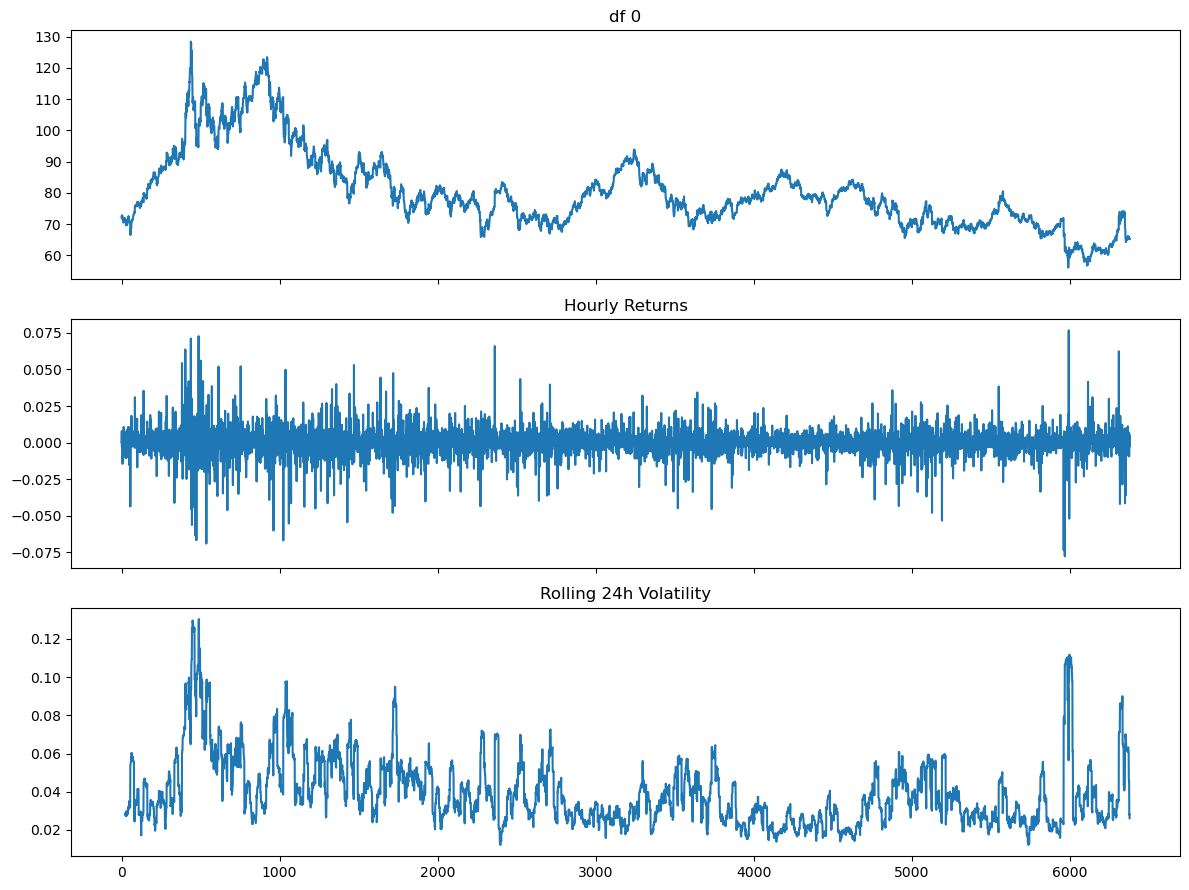

                ret    log_ret
mean       0.000085   0.000079
std        0.003576   0.003577
skew      -0.115433  -0.202751
kurtosis  14.263828  14.349674


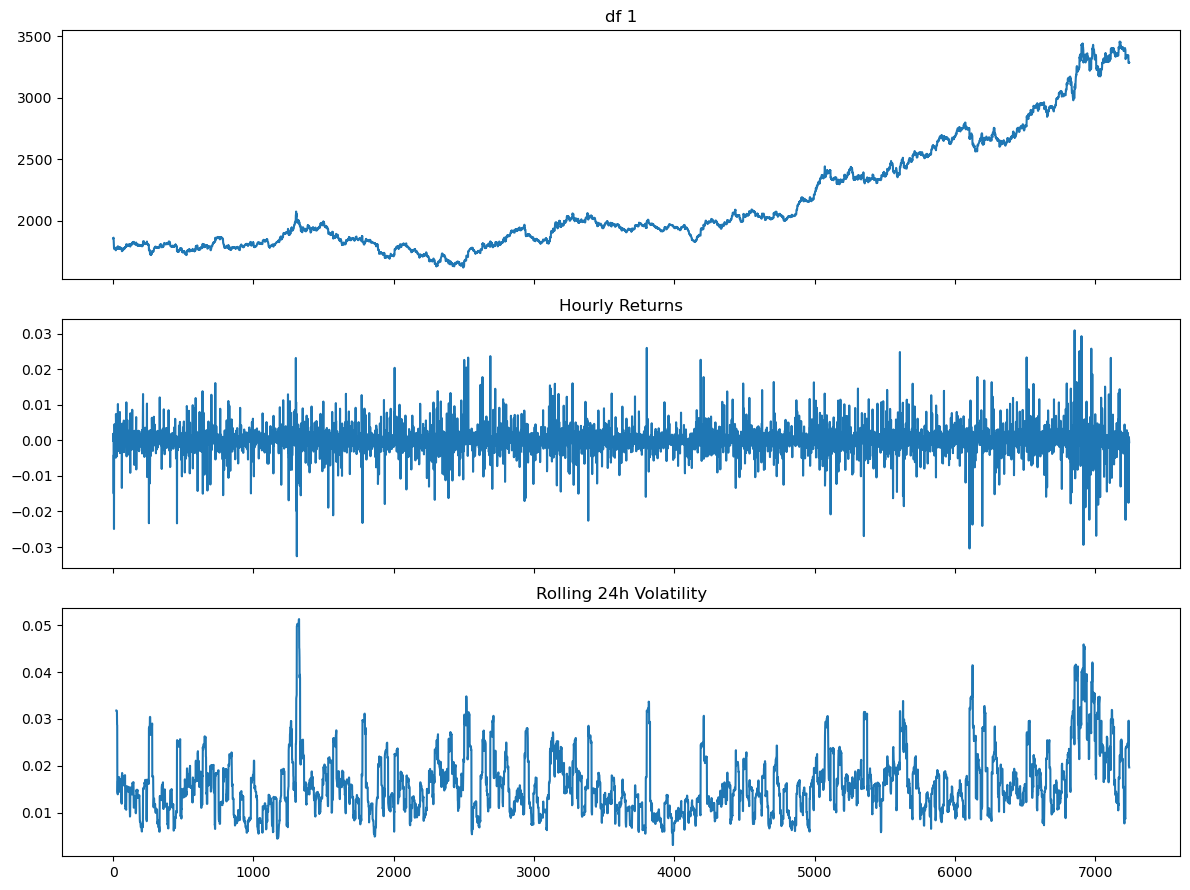

                ret    log_ret
mean       0.000065   0.000056
std        0.004160   0.004155
skew       0.543774   0.418306
kurtosis  19.052513  17.896322


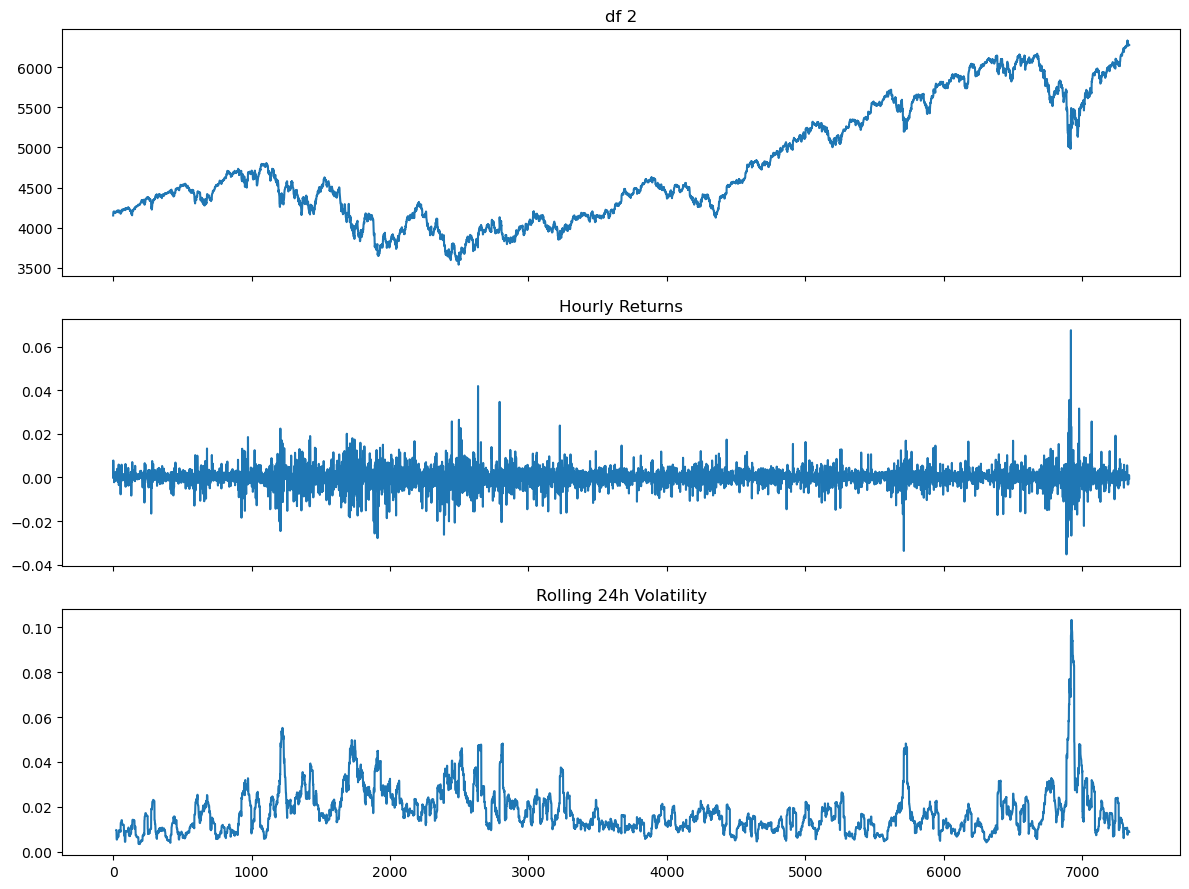

In [19]:
import matplotlib.pyplot as plt

for i, df in enumerate(dfs):
    df.columns = df.columns.str.lower()

    df["ret"] = df["close"].pct_change().fillna(0)
    df["log_ret"] = np.log1p(df["ret"])
    print(df[["ret","log_ret"]].agg(["mean","std","skew","kurtosis"]))

    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
    df["close"].plot(ax=axes[0], title=f"df {i}")
    df["ret"].plot(ax=axes[1], title="Hourly Returns")
    df["vol_24h"] = df["ret"].rolling(24).std() * (24**0.5)
    df["vol_24h"].plot(ax=axes[2], title="Rolling 24h Volatility")
    plt.tight_layout()
    plt.show()

    
